Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

loading the dataset nto dataframe

In [2]:
loan_dataset=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.shape

(614, 13)

In [5]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#droping the missing value
loan_dataset=loan_dataset.dropna()

In [8]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
#label encoding
loan_dataset.replace({'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)

<ipython-input-9-4fdbd0ad1ddb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)


In [10]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [12]:
#replace the value of 3+ in dependents to 4
loan_dataset.replace({'Dependents': {'3+': 4}}, inplace=True)

In [13]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


#Data Visualization

In [15]:
print(loan_dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


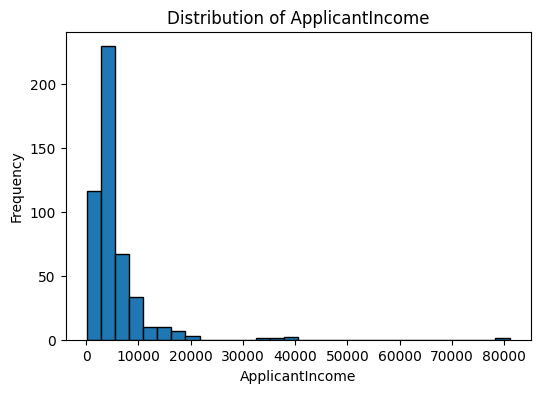

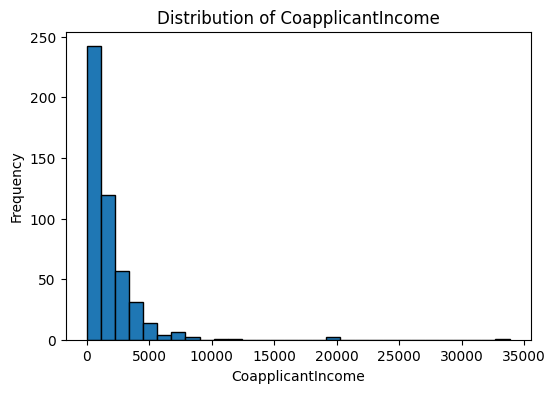

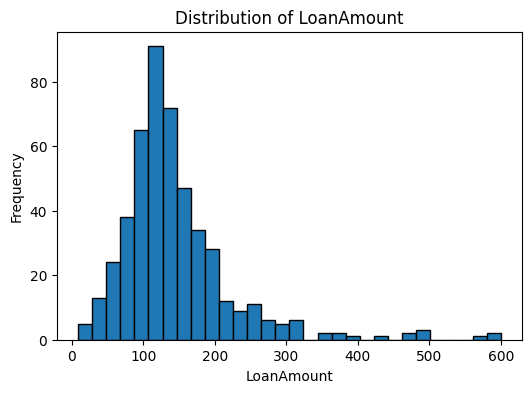

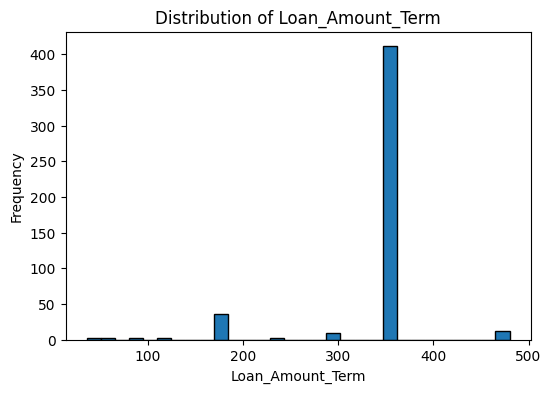

In [16]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.hist(loan_dataset[col].dropna(), bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


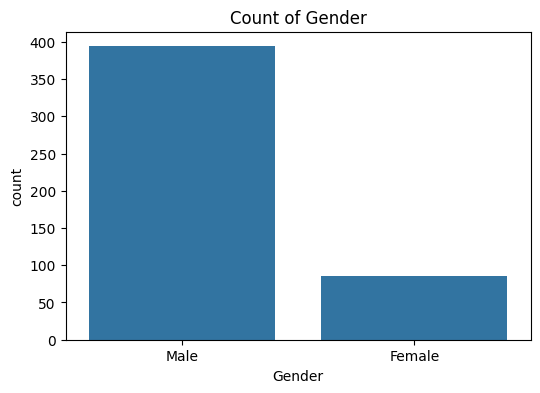

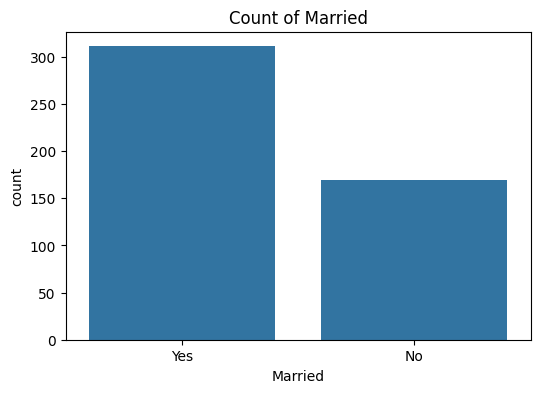

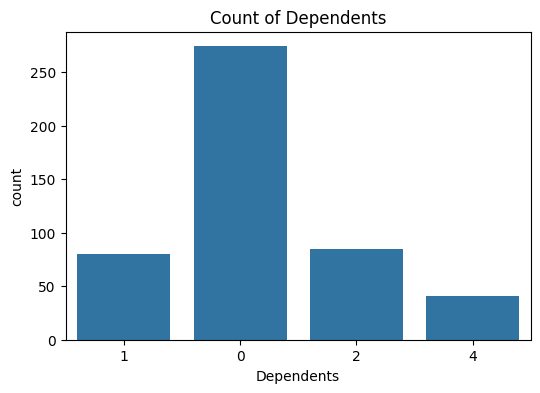

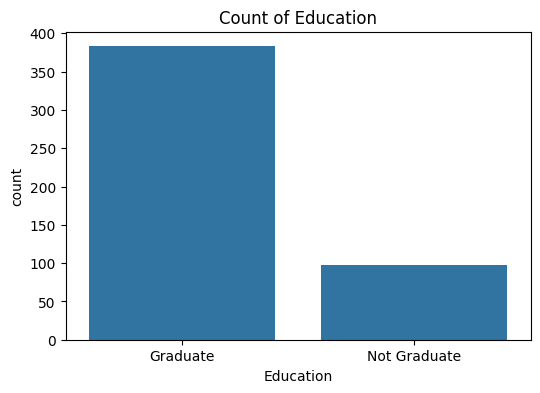

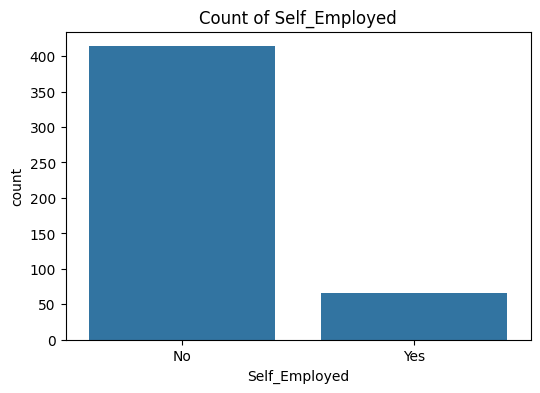

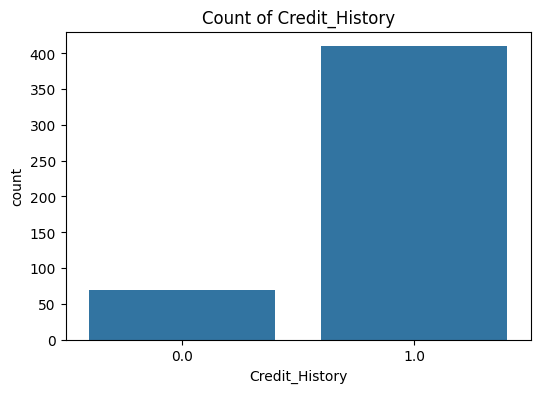

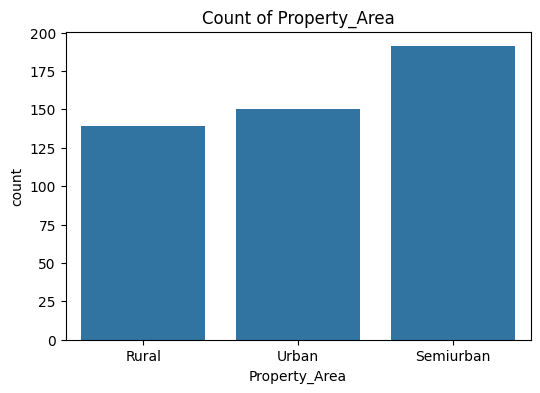

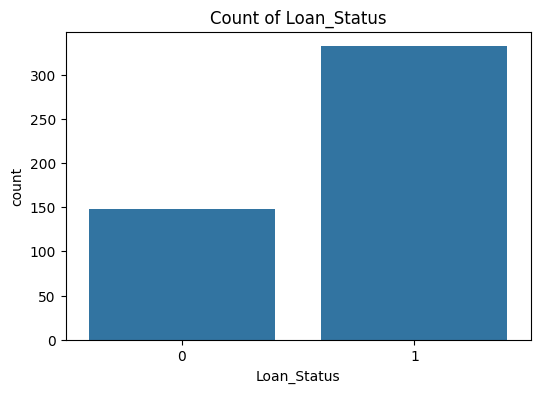

In [17]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=loan_dataset[col])
    plt.title(f'Count of {col}')
    plt.show()


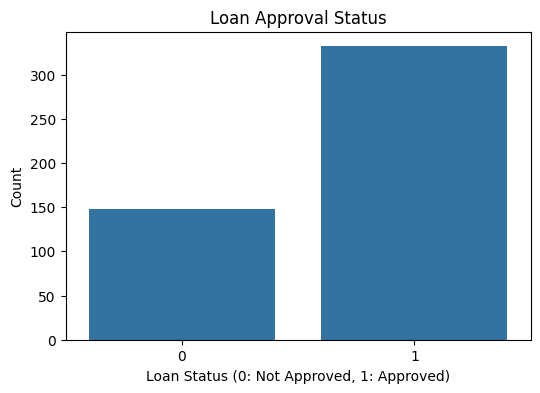

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=loan_dataset)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()


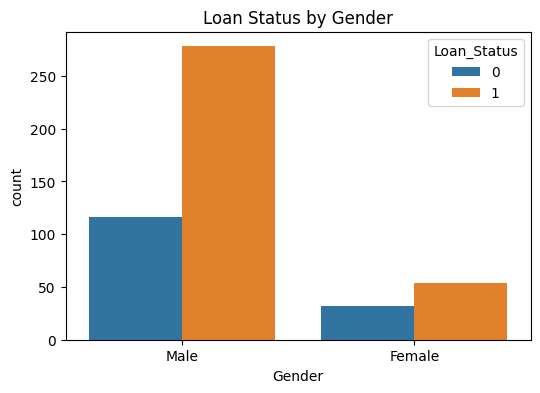

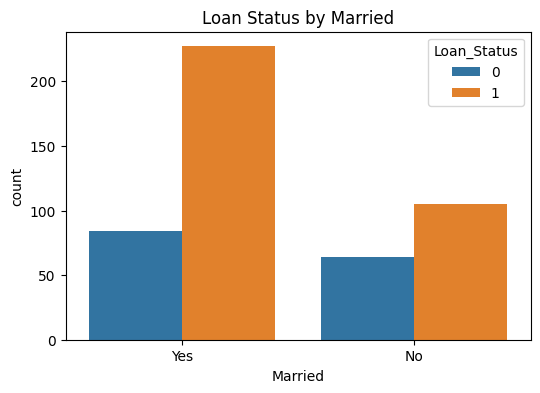

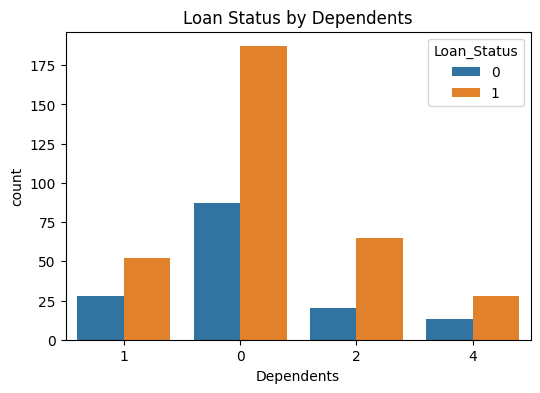

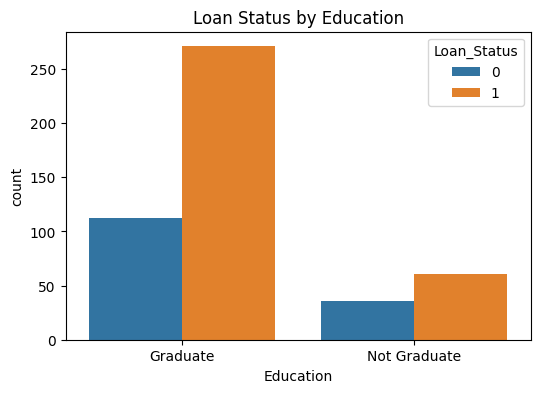

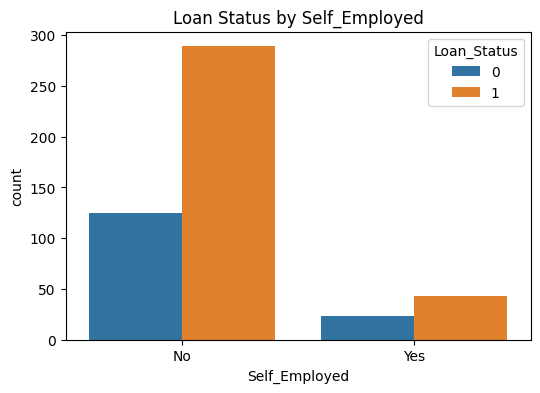

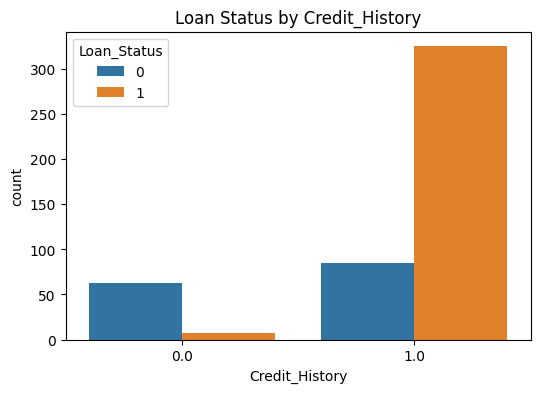

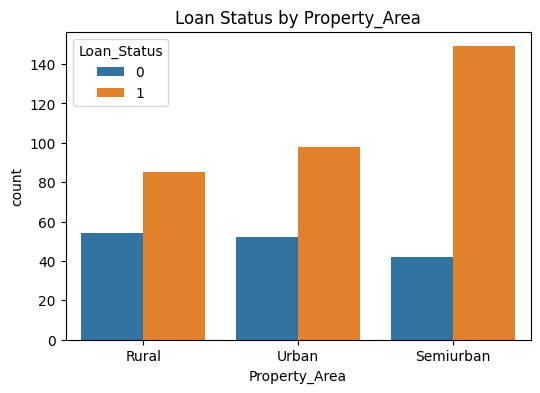

In [19]:
for col in categorical_cols[:-1]:  # Excluding 'Loan_Status' itself
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Loan_Status', data=loan_dataset)
    plt.title(f'Loan Status by {col}')
    plt.show()


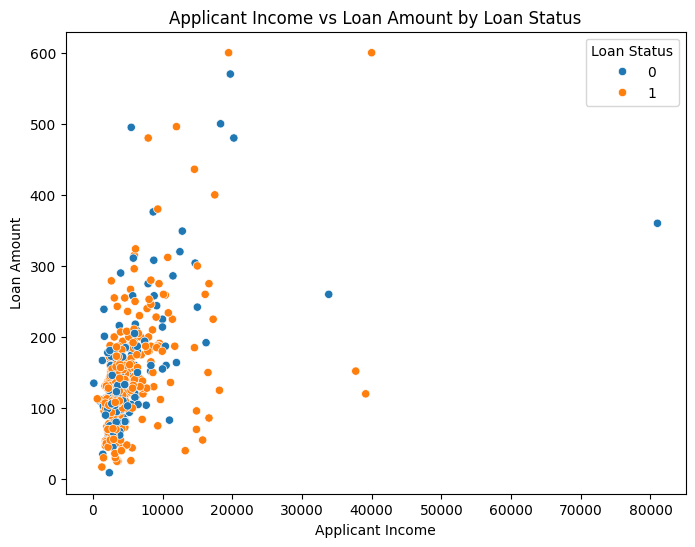

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan_dataset)
plt.title('Applicant Income vs Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()



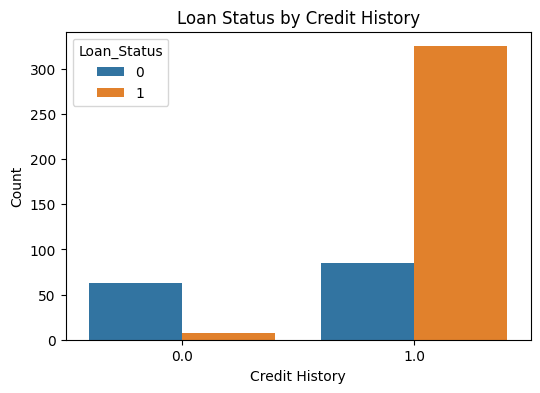

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_dataset)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()


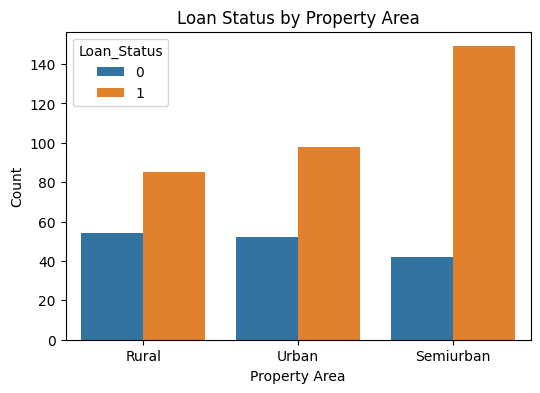

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_dataset)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


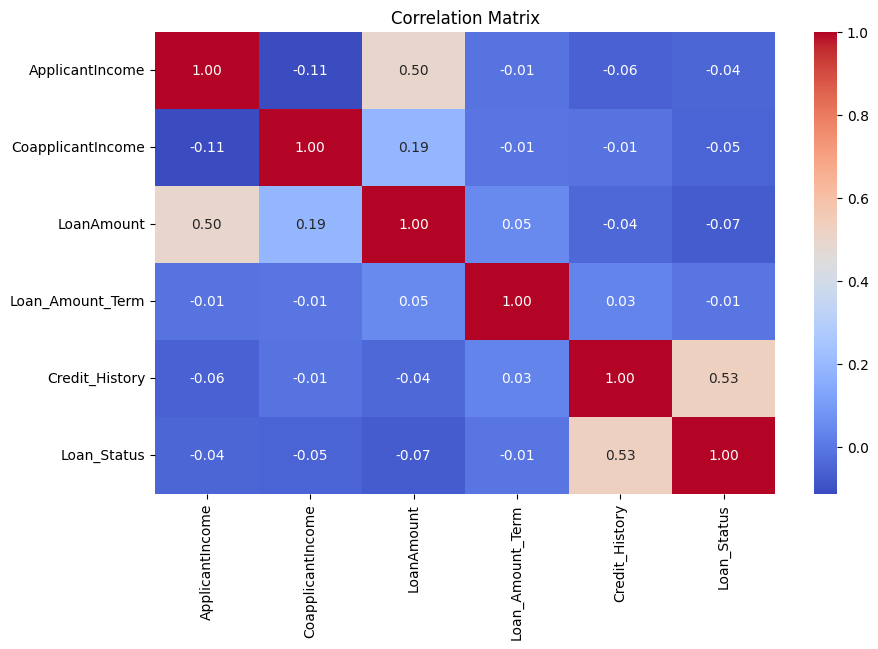

In [27]:
# Select only numeric columns
numeric_data = loan_dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on numeric data
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




convert catigorical columns to numerical values

In [29]:
loan_dataset.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)
loan_dataset.replace({'Married': {'Yes': 0, 'No': 1}}, inplace=True)
loan_dataset.replace({'Education': {'Graduate': 0, 'Not Graduate': 1}}, inplace=True)
loan_dataset.replace({'Self_Employed': {'Yes': 0, 'No': 1}}, inplace=True)
loan_dataset.replace({'Property_Area': {'Rural': 0, 'Urban': 1,'Semiurban':2}}, inplace=True)

<ipython-input-29-ab96ded00afa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)
<ipython-input-29-ab96ded00afa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married': {'Yes': 0, 'No': 1}}, inplace=True)
<ipython-input-29-ab96ded00afa>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [31]:
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,0,0,4,0,1,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,0,0,2,0,1,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,0,0,1,0,1,12841,10968.0,349.0,360.0,1.0,2,0
10,LP001024,0,0,2,0,1,3200,700.0,70.0,360.0,1.0,1,1


In [33]:
#seperate the data and label
x=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_dataset['Loan_Status']

In [34]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        0          1          0              1             4583   
2         0        0          0          0              0             3000   
3         0        0          0          1              1             2583   
4         0        1          0          0              1             6000   
5         0        0          2          0              0             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        1          0          0              1             2900   
610       0        0          4          0              1             4106   
611       0        0          1          0              1             8072   
612       0        0          2          0              1             7583   
613       1        1          0          0              0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [37]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1,stratify=y)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


The Model

In [39]:
classifier=svm.SVC(kernel='linear')

In [40]:
#train the data
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model evaluation

In [41]:
#accuracy score on training data
x_train_prediction=classifier.predict(x_train)
x_train_accuracy=accuracy_score(x_train_prediction,y_train)
print('the accuracy of train data is :',x_train_accuracy)

the accuracy of train data is : 0.7708333333333334


In [42]:
#accuracy score on test data
x_test_prediction=classifier.predict(x_test)
x_test_accuracy=accuracy_score(x_test_prediction,y_test)
print('the accuracy of train data is :',x_test_accuracy)

the accuracy of train data is : 0.75


Making a predictive system

In [45]:
# Ensure x_new is selected correctly from x_test
x_new = x_test.iloc[0].values.reshape(1, -1)  # Using .iloc[0] for the first row and reshaping if necessary

# Make the prediction
prediction = classifier.predict(x_new)

# Output the prediction result
print(prediction)
if prediction[0] == 0:
    print('The person cannot take a loan')
else:
    print('The person can take a loan')


[1]
The person can take a loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
